In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Read in the HPG dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv")
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')

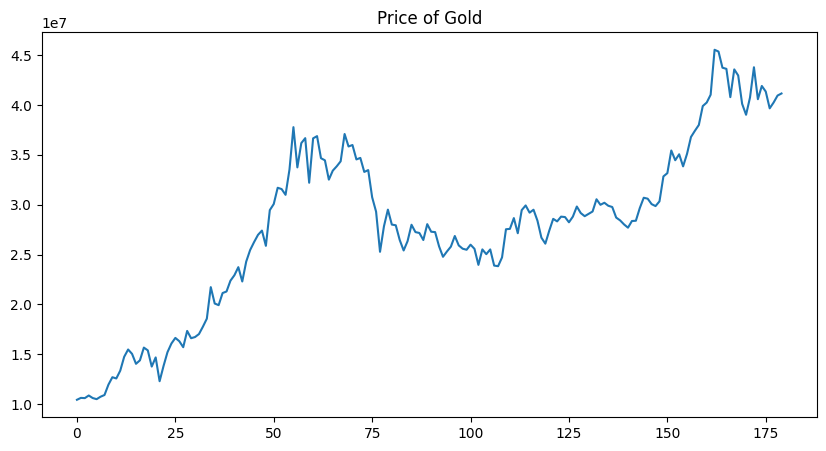

In [ ]:
df1 = pd.DataFrame(df, columns=['Date', 'Price'])

# Set the index of the DataFrame to the 'date' column
df1.index = df1.Date

# Drop the 'date' column from the DataFrame
df1.drop('Date', axis=1, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(df['VND'])
plt.title('Price of Gold')
plt.show()

# LSTM

In [ ]:
# Convert the 'df1' DataFrame to a NumPy array
data = df1.values

# Calculate the number of rows to use for the train dataset
t = .7
t = int(t * len(df))

# Extract the train dataset from the data array
train_data = data[:t]
# Extract the test dataset from the data array
test_data = data[t:]
print(test_data)

[[30196353.23]
 [29893027.09]
 [29769808.76]
 [28708455.2 ]
 [28427377.71]
 [28021893.66]
 [27695574.38]
 [28363614.09]
 [28390217.57]
 [29666405.  ]
 [30698076.75]
 [30604277.73]
 [30058459.33]
 [29861556.7 ]
 [30336594.23]
 [32836745.  ]
 [33165550.84]
 [35437480.14]
 [34460440.77]
 [35058571.72]
 [33846274.74]
 [35100544.38]
 [36789875.47]
 [37414526.12]
 [37998571.  ]
 [39893729.75]
 [40246727.91]
 [41030530.87]
 [45539502.59]
 [45361588.51]
 [43742113.54]
 [43625989.89]
 [40789814.51]
 [43570529.25]
 [42958727.33]
 [40114309.27]
 [39020979.88]
 [40753168.5 ]
 [43786246.57]
 [40580658.15]
 [41910091.25]
 [41346822.35]
 [39666129.11]
 [40250814.  ]
 [40948149.18]
 [41155323.73]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [        nan]]


In [ ]:
# Scale the data using a MinMaxScaler

# Create a MinMaxScaler object with a specified range
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 64 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(units=64, input_shape=(x_train.shape[1], 1), return_sequences=True,kernel_regularizer=l2(0.01)))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=True))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=False))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7-3.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.43403, saving model to save_model_7-3.hdf5
3/3 - 12s - loss: 0.4340 - 12s/epoch - 4s/step
Epoch 2/80

Epoch 2: loss improved from 0.43403 to 0.37331, saving model to save_model_7-3.hdf5
3/3 - 0s - loss: 0.3733 - 173ms/epoch - 58ms/step
Epoch 3/80

Epoch 3: loss improved from 0.37331 to 0.30282, saving model to save_model_7-3.hdf5
3/3 - 0s - loss: 0.3028 - 178ms/epoch - 59ms/step
Epoch 4/80

Epoch 4: loss improved from 0.30282 to 0.21460, saving model to save_model_7-3.hdf5
3/3 - 0s - loss: 0.2146 - 153ms/epoch - 51ms/step
Epoch 5/80

Epoch 5: loss improved from 0.21460 to 0.13993, saving model to save_model_7-3.hdf5
3/3 - 0s - loss: 0.1399 - 176ms/epoch - 59ms/step
Epoch 6/80

Epoch 6: loss did not improve from 0.13993
3/3 - 0s - loss: 0.1791 - 88ms/epoch - 29ms/step
Epoch 7/80

Epoch 7: loss improved from 0.13993 to 0.13445, saving model to save_model_7-3.hdf5
3/3 - 0s - loss: 0.1345 - 173ms/epoch - 58ms/step
Epoch 8/80

Epoch 8: loss i

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7-3.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

5/5 [==============================] - 3s 8ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-5:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[t:]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

2/2 [==============================] - 0s 11ms/step


In [ ]:
df1

,VND
Date,
2007-01-31,10434020.00
2007-02-28,10623214.02
2007-03-30,10601235.00
2007-04-30,10863142.00
2007-05-31,10608212.14
...,...
2022-08-31,NaN
2022-09-30,NaN
2022-10-31,NaN


<ipython-input-14-e436a4a9132a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['pred'] = y_train_predict
<ipython-input-14-e436a4a9132a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


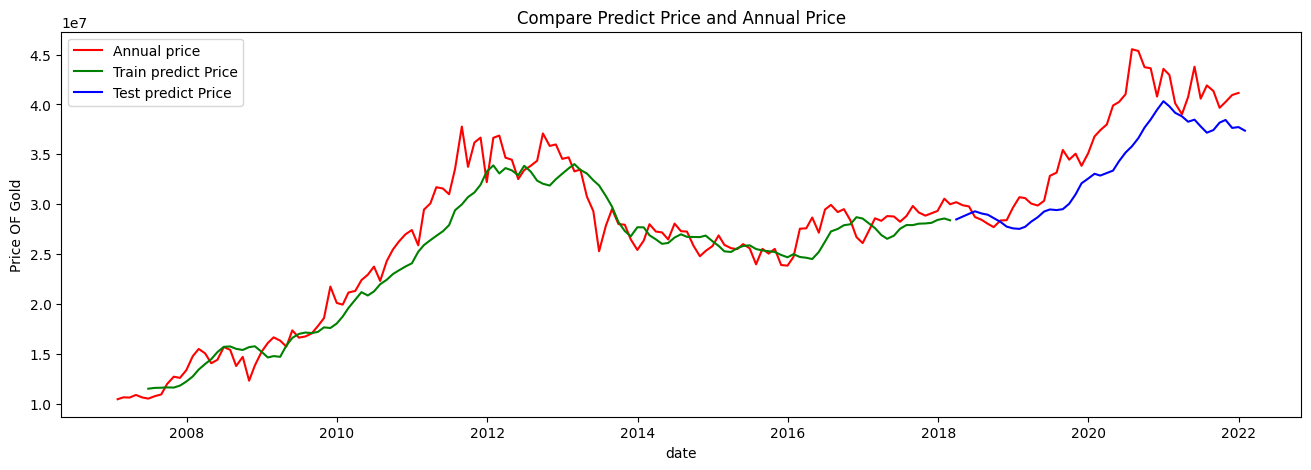

In [ ]:
# Create DataFrames for the training and test data
train_data1 = df1[5:t]
test_data1 = df1[t:]

# Create a plot to compare the predicted and true values for the training and test data
plt.figure(figsize=(16,5))
plt.plot(df1, label='Annual price', color='r')
train_data1['pred'] = y_train_predict
plt.plot(train_data1['pred'], label='Train predict Price', color='g')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('date')
plt.ylabel('Price OF Gold')
plt.legend()
plt.show()

In [ ]:
#Train data
# Calculate performance metrics for the training data
mae = mean_absolute_error(y_train, y_train_predict)  # Mean Absolute Error (MAE)
mape = mean_absolute_percentage_error(y_train, y_train_predict)  # Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_train, y_train_predict)  # Mean Squared Error (MSE)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
r2 = r2_score(y_train, y_train_predict)  # R-squared (R2)

# Print the performance metrics
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 1655744.31
MAPE: 6.51%
MSE: 4768418571998.95
RMSE: 2183670.89
R2: 0.90


In [ ]:
#Test data
# mae = mean_absolute_error(y_test, y_test_predict)
# mape = mean_absolute_percentage_error(y_test, y_test_predict)
# mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_test_predict)

# print(f"MAE: {mae:.2f}")
# print(f"MAPE: {mape * 100:.2f}%")
# print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
# print(f"R2: {r2:.2f}")

RMSE: 2183670.89


                    VND        pred
Date                               
2018-03-30  30196353.23  28467504.0
2018-04-30  29893027.09  28749474.0
2018-05-31  29769808.76  29030338.0
2018-06-29  28708455.20  29282958.0
2018-07-31  28427377.71  29064796.0
2018-08-31  28021893.66  28933920.0
2018-09-28  27695574.38  28602400.0
2018-10-31  28363614.09  28220286.0
2018-11-30  28390217.57  27747218.0
2018-12-31  29666405.00  27570386.0
2019-01-31  30698076.75  27517824.0
2019-02-28  30604277.73  27729140.0
2019-03-29  30058459.33  28241096.0
2019-04-30  29861556.70  28689332.0
2019-05-31  30336594.23  29258512.0
2019-06-28  32836745.00  29467906.0
2019-07-31  33165550.84  29405210.0
2019-08-30  35437480.14  29497554.0
2019-09-30  34460440.77  30043038.0
2019-10-31  35058571.72  30980262.0
2019-11-29  33846274.74  32091446.0
2019-12-31  35100544.38  32563294.0
2020-01-31  36789875.47  33045762.0
2020-02-28  37414526.12  32866992.0
2020-03-31  37998571.00  33124196.0
2020-04-30  39893729.75  333

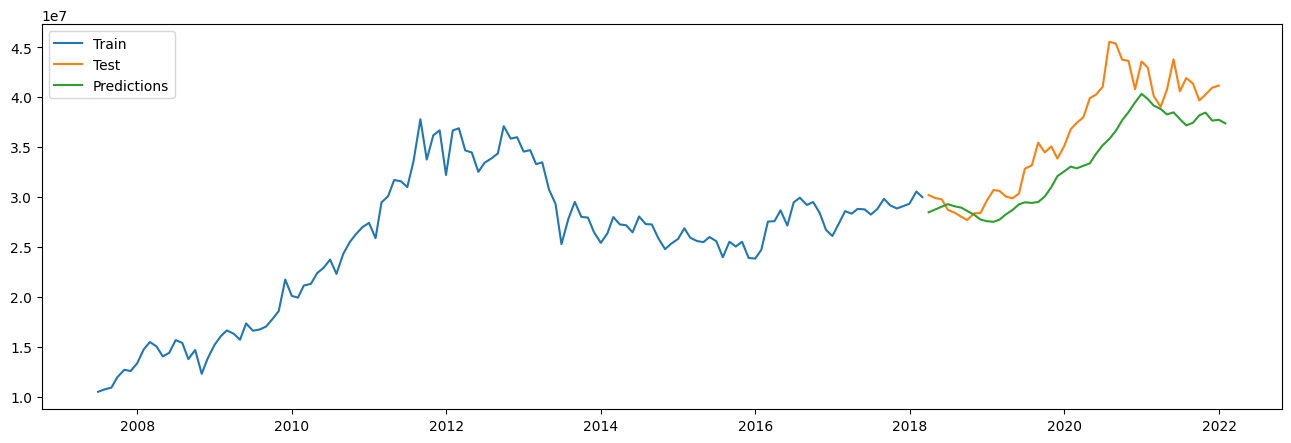

In [ ]:
# Create a plot to compare the predicted and true values for the training and test data
plt.figure(figsize=(16,5))
plt.plot(train_data1['VND'])
plt.plot(test_data1[['VND','pred']])
plt.legend(['Train','Test','Predictions'])
# plt.show()
print(test_data1)

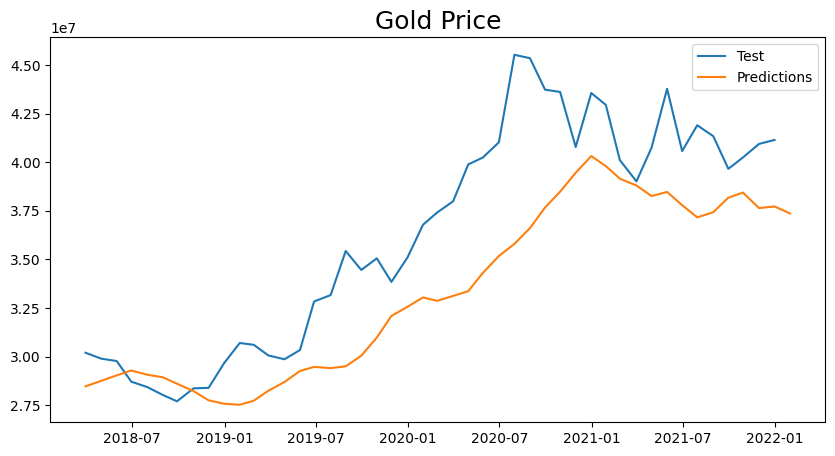

In [ ]:
# Create a plot to compare the predicted and true values for the test data
plt.figure(figsize=(10,5))
plt.plot(test_data1[['VND','pred']])
plt.legend(['Test','Predictions'])
plt.title('Gold Price', fontsize=18)
plt.show()